<a href="https://colab.research.google.com/github/Jin2ouS/colab/blob/main/MT5_%EB%A7%A4%EB%A7%A4%EB%82%B4%EC%97%AD_%EB%B6%84%EC%84%9D(%EA%B5%AC%EA%B8%80%EC%8B%9C%ED%8A%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실행환경 설정

## 한글 폰트 설치 (최초 1회)

In [2]:
# @title
# 한글 폰트 설치 (최초 1회)
!apt-get -qq update
!apt-get -qq install -y fonts-nanum fonts-noto-cjk
!fc-cache -fv

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-noto-cjk.
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new 

## 차트 환경설정

In [3]:
# @title
# 차트 환경설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
from pathlib import Path

# 나눔고딕 폰트 파일 경로 (Colab 고정 경로)
font_path = Path("/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

if not font_path.exists():
    raise FileNotFoundError(f"폰트 파일이 없습니다: {font_path}")

# 🔥 핵심: Matplotlib에 폰트 직접 등록
fm.fontManager.addfont(str(font_path))
font_name = fm.FontProperties(fname=str(font_path)).get_name()

print("사용 폰트 이름:", font_name)

# Matplotlib 기본 폰트로 설정
mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False

사용 폰트 이름: NanumGothic


# 📌 조회 기간 설정 (원하시는 날짜로 수정)

In [31]:
# 📌 조회 기간 설정 (원하시는 날짜로 수정)

### 시작 일자 ###
# 2025년부터
# START_DATE = "2025-01-01"

# 월초부터
START_DATE = "2026-01-01"

# 주초부터
# START_DATE = "2026-01-26"

### 종료 일자 ###
# END_DATE   = "2025-12-31"
END_DATE   = "2026-01-31"

# 매매내역 데이터 읽어오기
구글시트 - 엑셀파일을 구글드라이브에 업로드하여 공유

# 엑셀 파일 설정
 구글드라이브 파일공유 (구글시트)

URL 예시 : https://docs.google.com/spreadsheets/d/1ad_D4-hLMerVDajckaeEgRD0bGckM_2V/edit?gid=730902865#gid=730902865

파일명 설정

In [32]:
# URL 예시 : https://docs.google.com/spreadsheets/d/1ad_D4-hLMerVDajckaeEgRD0bGckM_2V/edit?gid=730902865#gid=730902865
# https://docs.google.com/spreadsheets/d/1ad_D4-hLMerVDajckaeEgRD0bGckM_2V/edit?gid=1181472689#gid=1181472689
SPREADSHEET_ID = "1ad_D4-hLMerVDajckaeEgRD0bGckM_2V"
GID = 1181472689


from urllib.parse import urlparse, parse_qs

# URL 예시
# url = "https://docs.google.com/spreadsheets/d/1ad_D4-hLMerVDajckaeEgRD0bGckM_2V/edit?gid=1181472689#gid=1181472689"
url = "https://docs.google.com/spreadsheets/d/1E9x8HFrOCzjYvxthj6EqWdh1k-Y_f7iW/edit?gid=1858409668#gid=1858409668"

SPREADSHEET_ID = url.split("/d/")[1].split("/")[0]

parsed = urlparse(url)
qs = parse_qs(parsed.query) or parse_qs(parsed.fragment)
GID = int(qs["gid"][0])

print(SPREADSHEET_ID, GID)


1E9x8HFrOCzjYvxthj6EqWdh1k-Y_f7iW 1858409668


파일 처리

In [33]:
# @title
xlsx_url = (
    f"https://docs.google.com/spreadsheets/d/"
    f"{SPREADSHEET_ID}/export?format=xlsx&gid={GID}"
)

### 🔽 엑셀 데이터 전처리 ###

In [34]:
# @title
### 🔽 엑셀 데이터 전처리 ###

import pandas as pd

df = pd.read_excel(xlsx_url, header=1)  # 첫줄 헤더 처리
df = df.dropna(axis=1, how="all")  # 전부 NaN인 컬럼 삭제

# 날짜 처리
for col in ["진입시간", "청산시간"]:
    df[col] = df[col].astype(str).str.replace("\n", " ", regex=False)
    df[col] = pd.to_datetime(df[col], format="%Y.%m.%d %H:%M:%S", errors="coerce")

# 화면 출력
print(df.shape)
print(df.columns)

print("[ df.head() ]")
display(df.head())
print("[ df.tail() ]")
display(df.tail())

(1641, 17)
Index(['진입시간', '포지션', '통화', '종류', '거래량', '전입가격', 'S / L', 'T / P', '청산시간',
       '청산가격', '커미션', '스왑', '수익', '계좌번호', '실수익', '진입기준', '비고'],
      dtype='object')
[ df.head() ]


,진입시간,포지션,통화,종류,거래량,전입가격,S / L,T / P,청산시간,청산가격,커미션,스왑,수익,계좌번호,실수익,진입기준,비고
0,2025-07-22 17:07:11,73816597,US100.b,buy,0.10,22998.23,NaN,23024.0,2025-07-22 17:13:39,23025.65,-0.06,0.0,2.74,NaN,2.68,NaN,NaN
1,2025-07-22 17:07:11,73816601,US100.b,buy,0.10,22998.33,23021.0,NaN,2025-07-22 17:14:25,23020.23,-0.06,0.0,2.19,NaN,2.13,NaN,NaN
2,2025-07-25 12:12:08,74561664,US100.b,buy,0.10,23218.45,NaN,23238.0,2025-07-25 13:49:48,23238.00,-0.06,0.0,1.96,NaN,1.90,NaN,NaN
3,2025-07-25 12:12:08,74561665,US100.b,buy,0.10,23218.45,23230.0,23255.0,2025-07-25 15:38:09,23229.70,-0.06,0.0,1.13,NaN,1.07,NaN,NaN
4,2025-07-28 13:04:37,74905038,XAUUSD.b,buy,0.01,3336.98,NaN,3338.1,2025-07-28 13:48:30,3338.10,-0.05,0.0,1.12,NaN,1.07,NaN,NaN


[ df.tail() ]


,진입시간,포지션,통화,종류,거래량,전입가격,S / L,T / P,청산시간,청산가격,커미션,스왑,수익,계좌번호,실수익,진입기준,비고
1636,2026-01-30 03:45:09,139752134,US100.b,buy,0.1,25707.90,NaN,NaN,2026-01-30 03:45:15,25704.55,-0.06,0.0,-0.34,50100857.0,-0.40,NaN,NaN
1637,2026-01-30 03:45:10,139752167,US100.b,buy,0.1,25707.70,NaN,NaN,2026-01-30 03:45:14,25704.85,-0.06,0.0,-0.29,50100857.0,-0.35,NaN,NaN
1638,2026-01-30 04:14:07,139742186,USOIL+,buy,0.1,64.08,64.7,64.9,2026-01-30 11:30:28,64.74,-0.20,0.0,6.60,50100857.0,6.40,NaN,NaN
1639,2026-01-30 04:14:07,139742104,USOIL+,buy,0.1,64.09,NaN,64.8,2026-01-30 11:13:20,64.80,-0.20,0.0,7.10,50100857.0,6.90,NaN,NaN
1640,2026-01-30 09:00:40,139917536,USOIL+,buy,0.1,63.95,NaN,64.7,2026-01-30 11:12:44,64.70,-0.20,0.0,7.50,50100857.0,7.30,NaN,NaN


### 📆 [ 전체 데이터 ] 월별 실수익 집계 ###

In [35]:
# @title
### 📆 월별 실수익 집계 ###

monthly_profit = (
    df.dropna(subset=["청산시간", "실수익"])
      .assign(월=df["청산시간"].dt.to_period("M").astype(str))
      .groupby("월", as_index=False)["실수익"]
      .sum()
      .rename(columns={"실수익": "월별실수익"})
)

display(monthly_profit)

# ✅ 월별 실수익 합계(전체)
total_monthly_profit = monthly_profit["월별실수익"].sum()
print(f"✅ 월별 실수익 합계: {total_monthly_profit:,.2f}")

,월,월별실수익
0,2025-07,39.96
1,2025-08,220.48
2,2025-09,232.48
3,2025-10,-1072.21
4,2025-11,357.97
5,2025-12,535.54
6,2026-01,607.72


✅ 월별 실수익 합계: 921.94


### 📅 [ 전체 데이터 ] 일별 실수익 집계 ###

In [36]:
# @title
### 📅 일별 실수익 집계 ###

# 청산 완료 + 실수익 있는 거래만 사용
daily_profit = (
    df.dropna(subset=["청산시간", "실수익"])
      .assign(일자=df["청산시간"].dt.date)
      .groupby("일자", as_index=False)["실수익"]
      .sum()
      .rename(columns={"실수익": "일별실수익"})
)

display(daily_profit)

# ✅ 일별 실수익 합계(전체)
total_daily_profit = daily_profit["일별실수익"].sum()
print(f"✅ 일별 실수익 합계: {total_daily_profit:,.2f}")



,일자,일별실수익
0,2025-07-22,4.81
1,2025-07-25,2.97
2,2025-07-28,7.59
3,2025-07-29,13.84
4,2025-07-30,-12.09
...,...,...
126,2026-01-26,72.27
127,2026-01-27,-284.20
128,2026-01-28,46.47
129,2026-01-29,77.05


✅ 일별 실수익 합계: 921.94


In [37]:
# @title
# 마지막 5일 데이터만 display (인덱스 숨김)
display(
    daily_profit
        .sort_values("일자")
        .tail(5)
        .reset_index(drop=True)   # ✅ 좌측 인덱스 제거
)

# ✅ 마지막 5일 일별실수익 합계
last_5_days_profit = (
    daily_profit
        .sort_values("일자")
        .tail(5)["일별실수익"]
        .sum()
)

print(f"\n✅ 최근 5일 일별 실수익 합계: {last_5_days_profit:,.2f}")

,일자,일별실수익
0,2026-01-26,72.27
1,2026-01-27,-284.20
2,2026-01-28,46.47
3,2026-01-29,77.05
4,2026-01-30,140.74



✅ 최근 5일 일별 실수익 합계: 52.33


### ⏱ 데이터 조회기간 처리 (진입시간 기준) ###

In [38]:
# @title
# 조회기간 처리 및 데이터 처리

# 문자열 → datetime
start_dt = pd.to_datetime(START_DATE)
end_dt   = pd.to_datetime(END_DATE)

# 진입시간 기준 + 실수익 있는 거래만 필터링
df_period = (
    df.dropna(subset=["진입시간", "실수익"])
      .loc[(df["진입시간"] >= start_dt) & (df["진입시간"] <= end_dt)]
      .copy()
)

print(f"조회기간 (진입시간 기준): {START_DATE} ~ {END_DATE}")
print("데이터 건수:", len(df))

display(df_period.head())
display(df_period.tail())

조회기간 (진입시간 기준): 2026-01-01 ~ 2026-01-31
데이터 건수: 1641


,진입시간,포지션,통화,종류,거래량,전입가격,S / L,T / P,청산시간,청산가격,커미션,스왑,수익,계좌번호,실수익,진입기준,비고
1182,2026-01-02 02:05:14,126750560,XAUUSD.b,sell,0.01,4345.66,4342.30,NaN,2026-01-02 02:26:32,4342.3,-0.05,0.0,3.36,50115679.0,3.31,NaN,NaN
1183,2026-01-02 02:05:15,126750561,XAUUSD.b,sell,0.01,4345.69,4342.70,NaN,2026-01-02 02:25:43,4342.7,-0.05,0.0,2.99,50115679.0,2.94,NaN,NaN
1184,2026-01-02 10:30:08,126865927,US100.b,sell,0.10,25472.65,NaN,25450.0,2026-01-02 14:13:25,25484.3,-0.06,0.0,-1.17,50115679.0,-1.23,NaN,NaN
1185,2026-01-02 10:30:08,126865929,US100.b,sell,0.10,25472.65,25487.16,25440.0,2026-01-02 14:15:03,25487.6,-0.06,0.0,-1.50,50115679.0,-1.56,NaN,NaN
1186,2026-01-02 11:02:25,126875552,XAUUSD.b,sell,0.01,4389.02,4386.00,4384.0,2026-01-02 11:22:43,4384.0,-0.05,0.0,5.02,50115679.0,4.97,NaN,NaN


,진입시간,포지션,통화,종류,거래량,전입가격,S / L,T / P,청산시간,청산가격,커미션,스왑,수익,계좌번호,실수익,진입기준,비고
1636,2026-01-30 03:45:09,139752134,US100.b,buy,0.1,25707.90,NaN,NaN,2026-01-30 03:45:15,25704.55,-0.06,0.0,-0.34,50100857.0,-0.40,NaN,NaN
1637,2026-01-30 03:45:10,139752167,US100.b,buy,0.1,25707.70,NaN,NaN,2026-01-30 03:45:14,25704.85,-0.06,0.0,-0.29,50100857.0,-0.35,NaN,NaN
1638,2026-01-30 04:14:07,139742186,USOIL+,buy,0.1,64.08,64.7,64.9,2026-01-30 11:30:28,64.74,-0.20,0.0,6.60,50100857.0,6.40,NaN,NaN
1639,2026-01-30 04:14:07,139742104,USOIL+,buy,0.1,64.09,NaN,64.8,2026-01-30 11:13:20,64.80,-0.20,0.0,7.10,50100857.0,6.90,NaN,NaN
1640,2026-01-30 09:00:40,139917536,USOIL+,buy,0.1,63.95,NaN,64.7,2026-01-30 11:12:44,64.70,-0.20,0.0,7.50,50100857.0,7.30,NaN,NaN


### 📅 [ 조회기간 ] 일별 실수익 집계 ###

In [39]:
# @title
### 📅 일별 실수익 집계 ###

# 청산 완료 + 실수익 있는 거래만 사용
daily_profit = (
    df_period.dropna(subset=["청산시간", "실수익"])
      .assign(일자=df["청산시간"].dt.date)
      .groupby("일자", as_index=False)["실수익"]
      .sum()
      .rename(columns={"실수익": "일별실수익"})
)

display(daily_profit)


# ✅ 일별실수익 합계(총합) 출력 추가
total_profit = daily_profit["일별실수익"].sum()
print(f"✅ 조회기간 일별실수익 합계: {total_profit:,.2f}")

,일자,일별실수익
0,2026-01-02,30.16
1,2026-01-05,40.45
2,2026-01-06,22.70
3,2026-01-07,11.25
4,2026-01-08,31.14
5,2026-01-09,38.64
6,2026-01-12,28.32
7,2026-01-13,30.76
8,2026-01-14,31.05
9,2026-01-15,47.00


✅ 조회기간 일별실수익 합계: 607.72


### 📊 [matplotlib] 일별 실수익 + 누적 실수익 차트 (진입일 기준) ###

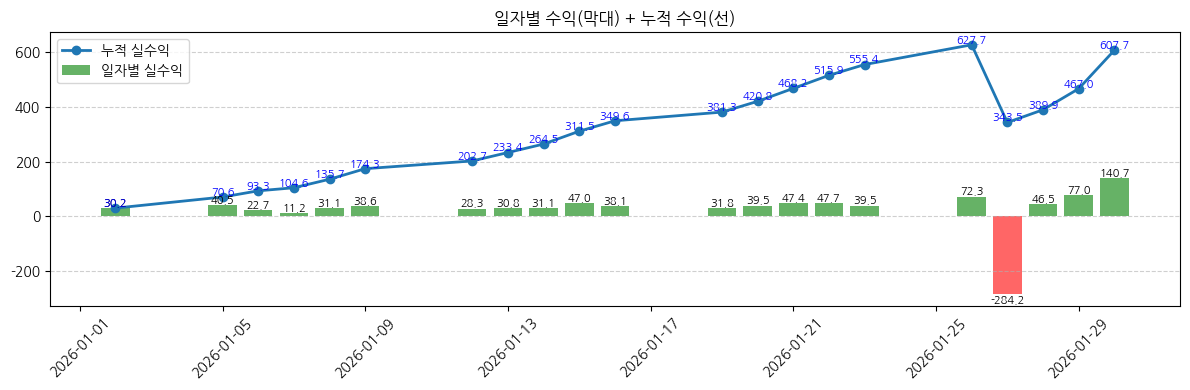

In [40]:
# @title
### 📊 일별 실수익 + 누적 실수익 차트 (진입일 기준) ###

# 1) 일별 집계 (진입일 기준)
daily_df = (
    df_period.dropna(subset=["진입시간", "실수익"])
             .assign(일자=df["진입시간"].dt.normalize())  # 날짜(00:00:00)로 정규화
             .groupby("일자", as_index=True)["실수익"]
             .sum()
             .sort_index()
)

# (선택) 날짜가 끊긴 구간도 보이게 하고 싶으면 주석 해제
# all_days = pd.date_range(daily_df.index.min(), daily_df.index.max(), freq="D")
# daily_df = daily_df.reindex(all_days, fill_value=0)

# 2) 누적 실수익
cum_profit = daily_df.cumsum()

# 3) 막대 색상 분기 (양수=초록, 음수=빨강)
bar_colors = ["green" if v >= 0 else "red" for v in daily_df.values]

plt.figure(figsize=(12, 4))

# 4) 일자별 실수익 (막대)
plt.bar(
    daily_df.index,
    daily_df.values,
    color=bar_colors,
    width=0.8,
    alpha=0.6,
    label="일자별 실수익"
)


# ▶ 막대 위에 값 라벨 추가
for x, y in zip(daily_df.index, daily_df.values):
    if y == 0:
        continue
    plt.text(
        x,
        y,
        f"{y:.1f}",
        ha="center",
        va="bottom" if y > 0 else "top",
        fontsize=8,
        color="black",
        rotation=0
    )


# 5) 누적 실수익 (선) — 동일 Y축
plt.plot(
    cum_profit.index,
    cum_profit.values,
    marker="o",
    linewidth=2,
    label="누적 실수익"
)

# ▶ 누적 수익 선 위에 값 라벨 추가
for x, y in zip(cum_profit.index, cum_profit.values):
    plt.text(
        x,
        y,
        f"{y:.1f}",
        ha="center",
        va="bottom",
        fontsize=8,
        color="blue"
    )


plt.title("일자별 수익(막대) + 누적 수익(선)")
# plt.xlabel("일자")

# ✅ y축 값을 숨기고 싶으면 아래 1줄만 주석 해제하세요
# plt.gca().yaxis.set_visible(False)

plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

### 📊 [ Plotly ] 일자별 실수익(막대) + 누적 실수익(선) (음수막대 표시 수정)
# 요구사항: x축 전체 일자 표시 / 범례 차트 안 / 제목 가운데

In [49]:
# @title
import plotly.graph_objects as go
import pandas as pd
from urllib.parse import urlparse, parse_qs  # (이미 다른 셀에서 쓰면 없어도 됨)

### 📊 Plotly: 일자별 실수익(막대) + 누적 실수익(선) ###
# 요구사항: x축 전체 일자 표시 / 범례 차트 안 / 제목 가운데

plot_df = pd.DataFrame({
    "일자": daily_df.index,
    "일별실수익": daily_df.values,
    "누적실수익": cum_profit.values,
}).reset_index(drop=True)

# ✅ 전체 일자 생성 후 reindex (빈 날짜는 0)
all_days = pd.date_range(
    plot_df["일자"].min(),
    plot_df["일자"].max(),
    freq="D"
)

plot_df = (
    plot_df.set_index("일자")
           .reindex(all_days)
           .rename_axis("일자")
           .reset_index()
)

plot_df["일별실수익"] = plot_df["일별실수익"].fillna(0)
plot_df["누적실수익"] = plot_df["일별실수익"].cumsum()

fig = go.Figure()

# ✅ 일별 실수익 막대: 1개 trace로 통합 + 값에 따라 색상 지정 (수정)
fig.add_trace(go.Bar(
    x=plot_df["일자"],
    y=plot_df["일별실수익"],
    name="일자별 실수익",
    marker_color=["green" if v >= 0 else "red" for v in plot_df["일별실수익"]],  # ✅ (수정)
    opacity=0.6,
    hovertemplate=(
        "일별 실수익=%{y:.2f}"
        "<extra></extra>"
    ),
))

# ✅ 누적 실수익 선 (라벨 없음)
fig.add_trace(go.Scatter(
    x=plot_df["일자"],
    y=plot_df["누적실수익"],
    name="누적 실수익",
    mode="lines+markers",
    hovertemplate=(
        "누적 실수익=%{y:.2f}"
        "<extra></extra>"
    ),
))

# ✅ 레이아웃 설정
fig.update_layout(
    title=dict(
        text="일자별 수익 + 누적 수익",
        x=0.5,
        xanchor="center"
    ),
    barmode="relative",  # ✅ (수정) overlay → relative
    bargap=0.25,
    hovermode="x unified",
    template="plotly_white",
    height=420,
    margin=dict(l=40, r=40, t=60, b=60),
)

# ✅ 범례를 차트 내부 좌상단
fig.update_layout(
    legend=dict(
        x=0.01,
        y=0.99,
        xanchor="left",
        yanchor="top",
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="rgba(0,0,0,0.2)",
        borderwidth=1
    )
)

# ✅ x축: 모든 날짜 표시
fig.update_xaxes(
    tickmode="array",
    tickvals=all_days,
    tickformat="%Y-%m-%d",
    tickangle=45,
    hoverformat="%Y-%m-%d (%a)"   # ✅ 노란 박스 요일 표시
)

# ✅ y축 여백 (라벨 잘림 방지)
y_max = max(plot_df["일별실수익"].max(), plot_df["누적실수익"].max())
y_min = min(plot_df["일별실수익"].min(), plot_df["누적실수익"].min())

pad = (y_max - y_min) * 0.15 if y_max != y_min else 1
fig.update_yaxes(range=[y_min - pad, y_max + pad])

# ✅ y축 숫자 표시 제거
fig.update_yaxes(showticklabels=False)

fig.show()


### 라벨 추가

In [48]:
# @title
import plotly.graph_objects as go
import pandas as pd

### 📊 Plotly: 일자별 실수익(막대) + 누적 실수익(선) ###

plot_df = pd.DataFrame({
    "일자": daily_df.index,
    "일별실수익": daily_df.values,
    "누적실수익": cum_profit.values,
}).reset_index(drop=True)

# ✅ 전체 일자(연속) 생성 후 reindex
all_days = pd.date_range(
    plot_df["일자"].min(),
    plot_df["일자"].max(),
    freq="D"
)

plot_df = (
    plot_df.set_index("일자")
           .reindex(all_days)
           .rename_axis("일자")
           .reset_index()
)

plot_df["일별실수익"] = plot_df["일별실수익"].fillna(0)
plot_df["누적실수익"] = plot_df["일별실수익"].cumsum()

fig = go.Figure()

# ======================================================
# ✅ 일별 실수익 막대 (1개 trace + 조건부 색상 + 라벨)
# ======================================================
fig.add_trace(go.Bar(
    x=plot_df["일자"],
    y=plot_df["일별실수익"],
    name="일자별 실수익",
    marker_color=[
        "green" if v >= 0 else "red"
        for v in plot_df["일별실수익"]
    ],
    opacity=0.6,
    text=plot_df["일별실수익"].round(1),
    textposition=[
        "outside" if v >= 0 else "outside"
        for v in plot_df["일별실수익"]
    ],
    hovertemplate=(
        "일별 실수익=%{y:.2f}"
        "<extra></extra>"
    ),
))

# ✅ 누적 실수익 선
fig.add_trace(go.Scatter(
    x=plot_df["일자"],
    y=plot_df["누적실수익"],
    name="누적 실수익",
    mode="lines+markers",
    hovertemplate=(
        "누적 실수익=%{y:.2f}"
        "<extra></extra>"
    ),
))

# =========================
# ✅ 누적 라벨 전용 Scatter (기존 로직 유지)
# =========================
STEP = 7
START = 0

START = max(0, min(START, len(plot_df) - 1))
label_idx = list(range(START, len(plot_df), STEP))

last_idx = len(plot_df) - 1
if last_idx not in label_idx:
    label_idx.append(last_idx)

label_df = plot_df.iloc[label_idx].copy()

fig.add_trace(go.Scatter(
    x=label_df["일자"],
    y=label_df["누적실수익"],
    mode="text",
    text=label_df["누적실수익"].map(lambda v: f"{v:.1f}"),
    textposition="top center",
    showlegend=False,
    hoverinfo="skip",
))
# =========================

# ✅ 레이아웃
fig.update_layout(
    title=dict(
        text="일자별 수익 + 누적 수익 (값라벨)",
        x=0.5,
        xanchor="center"
    ),
    barmode="relative",   # ✅ 핵심 수정
    bargap=0.25,
    hovermode="x unified",
    template="plotly_white",
    height=420,
    margin=dict(l=40, r=40, t=60, b=60),
)

# ✅ 범례 (차트 내부)
fig.update_layout(
    legend=dict(
        x=0.01, y=0.99,
        xanchor="left", yanchor="top",
        bgcolor="rgba(255,255,255,0.6)",
        bordercolor="rgba(0,0,0,0.2)",
        borderwidth=1
    )
)

# ✅ x축: 모든 날짜 표시
fig.update_xaxes(
    tickmode="array",
    tickvals=all_days,
    tickformat="%Y-%m-%d",
    tickangle=45,
    hoverformat="%Y-%m-%d (%a)"   # ✅ 노란 박스 요일 표시
)

# ✅ y축 여백
y_max = max(plot_df["일별실수익"].max(), plot_df["누적실수익"].max())
y_min = min(plot_df["일별실수익"].min(), plot_df["누적실수익"].min())
pad = (y_max - y_min) * 0.15 if y_max != y_min else 1
fig.update_yaxes(range=[y_min - pad, y_max + pad])

fig.show()
